# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [2]:
# Do all imports and installs here
!pip install pandas_datareader

!pip install -U seaborn

## seaborn update: might need to restart the kernal after installing the seaborn updated versoin, i was having problem
## alway restart the kernal then it works

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import os
import glob
from datetime import datetime
import numpy as np

import pandas as pd
import html5lib
from bs4 import BeautifulSoup
import requests


import shutil
import pandas_datareader.data as web
import shutil
import csv
#import json
import pandas_datareader.data as web
import datetime as dt
#import pickle
import requests
import bs4 as bs





Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.1)


### Step 1: Scope the Project and Gather Data

#### Scope 
The scope of this project is to use **COVID19** data and see its impact on the **stock market**. 
To perform the analysis stock market data from [S&P500 companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) are used. During the pandamic market seriously impacted, financial stock market was crashed in early 2020 all over the world but most impact was in USA as its the biggest stock market of the world.

### Project details
This project will use the covid19 data, the daily and total cases and deaths will be compare against the market index of S&P 500 companies. There will be four data set used (referece bellow), first the data cleansing and analysis will be done and then the ETL pipeline will be setup.

### Data Used in this project
1. **S&P500 companies**: List of all S&p500 companies (data fetched from wikipedia using python html table) 
2. **Stock info of S&P500 companies**: The list of companies fetched from above [1] is then used to feteched the **stock info** by using Yahoo API(past five years of stock market data of all s&p companies is USA stock exchange) more details are bellow.
3.**Global COVID-19 data**: Covid19 data is used from the [github](https://github.com/owid/covid-19-data/tree/master/public/dataopen) full data set from 2020-2021 is used. 
4.**S&P500 Index from USA**: S&P500 index is also fetched from Yahoo finance website to analyse the market trend. Download the S&P500 index data in CSV format from the [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history/), max data set is downloaded from 1927 

### End Solution
The aim is to provide the solution by creating ETL pipeline of the above data so that daily grapsh can be created for Financal Analyst or Stock market broker the analyse the individual stock and market trend in pandamic.

### Tools Used
- S3
- Python
- Redshift
- SQL

#### Describe and Gather Data 
The data and its sources used in this project is described above, here short overview of what type of information each data contains.

1.**S&P500 companies**: This data include info like list of all S&p500 companies, the name of company, stock ticker(Apple:AAPL), sector, industry it belong to, date it join the stock exchange, etc.
2.**Stock info of S&P500 companies**: Individual stock info of each of the company, daily low, high, open, close, volume info of stock.
3.**Global COVID-19 data**: Daily count of new cases, total cases and death on global level.
4.**S&P500 Index from USA**: S&P500 index info, the low, high , open close, volume of S&P500 index.



In [3]:
# Read in the data here

#####(data source 4)
#GSPC_full.csv is downloaded from the Yahoo finance link mentioned above
s_and_p_index=pd.read_csv('GSPC_full.csv')

#renaming column name to lower cases
s_and_p_index.rename(columns={'Date': 'date','Open':'open', 'High':'high','Close':'close','Adj Close':'adjclose','Volume':'volume'}, inplace=True)
s_and_p_index.head()



,date,open,high,Low,close,adjclose,volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [4]:
#####(data source 3)
#COVID19 data is downloaded from the linke bellow
#https://github.com/owid/covid-19-data/tree/master/public/data
covid19_df_full=pd.read_csv('owid-covid-data.csv')
covid19_df_full.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [5]:
## choosign selected columns
covid19_df=covid19_df_full.iloc[:,0:6]

#renaming column name to lower cases
covid19_df=covid19_df_full.loc[:,['iso_code', 'continent', 'location','date','total_cases','new_cases','total_deaths','new_deaths']]

##replacing NaN values with zero
covid19_df['total_deaths'] = covid19_df['total_deaths'].replace(np.nan, 0)
covid19_df['new_deaths'] = covid19_df['new_deaths'].replace(np.nan, 0)
#covid19_df.to_csv('covid19_df_clean.csv', index = False, header=True)

covid19_df.tail()



,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
66962,ZWE,Africa,Zimbabwe,2021-02-01,33548.0,160.0,1234.0,17.0
66963,ZWE,Africa,Zimbabwe,2021-02-02,33814.0,266.0,1254.0,20.0
66964,ZWE,Africa,Zimbabwe,2021-02-03,33964.0,150.0,1269.0,15.0
66965,ZWE,Africa,Zimbabwe,2021-02-04,34171.0,207.0,1288.0,19.0
66966,ZWE,Africa,Zimbabwe,2021-02-05,34331.0,160.0,1303.0,15.0


In [6]:
covid19_df.shape

(66967, 8)

In [7]:
### S&P500 companies Data source 1


# Scrape the entire S&P500 list from Wikipedia into a Pandas DataFrame;
ticker_list = pd.read_html(
'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = ticker_list[0]
df.columns = df.iloc[0]
df = df[1:]
df.to_csv('export_sandp500_company.csv', index = False, header=True)


s_and_p_company_info=pd.read_csv('export_sandp500_company.csv')
# dropping all unnecessary columns
small_s_and_p_company_info = s_and_p_company_info.drop(['SEC filings','Headquarters Location','Date first added','CIK','Founded'], axis=1)
small_s_and_p_company_info.head()


,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,Abiomed,Health Care,Health Care Equipment
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [8]:

# renameing columns
small_s_and_p_company_info.rename(columns={'Symbol':'ticker','Security': 'company_name', 'GICS Sector':'sector','GICS Sub-Industry':'industry'}, inplace=True)
small_s_and_p_company_info.head()
small_s_and_p_company_info.to_csv('csv_companylistsnp_500_final.csv', index = False, header=True)


In [9]:
"""
   This method will get a ticker for each company and create a CSV for each of the ticker
"""
def get_stock_data_from_yahoo_financials():
    
  
    tickers=small_s_and_p_company_info.values.tolist()
   
    if os.path.exists('stock_dfs/csv'):
        shutil.rmtree('stock_dfs/csv')
    os.makedirs('stock_dfs/csv')
    
   ## start TIME DATE IS CONFIGURABLE, currently its set to fetch 5 years of data
    start = dt.datetime(2015,1,1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        # build a dataframe with all ticker information from yahoo and set the date value as the index
        df = web.DataReader(ticker[0].replace('.', '-'), 'yahoo', start, end)
        df.reset_index(inplace=True)
        df.set_index('Date', inplace=True)
        df.insert(0, 'company', ticker[0])
            
        # store each ticker into it's own csv file on a folder located together with the notebooks 
        df.to_csv('stock_dfs/csv/{}.csv'.format(ticker[0]))
        
   

In [1]:
get_stock_data_from_yahoo_financials()

In [10]:
# getting file path 
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.csv'))
        for f in files :
            all_files.append(os.path.abspath(f))
    
    return all_files

In [11]:
song_files = get_files("stock_dfs/csv")

In [12]:
#df = pd.read_csv(song_files[1:2])
li =[]
for files in song_files:
    df_files =pd.read_csv(files)
    li.append(df_files)
big_frame = pd.concat(li, ignore_index=True)
    
    
    

In [13]:
big_frame.tail()

,Date,company,High,Low,Open,Close,Volume,Adj Close
7825,2021-02-08,EXPD,94.680000,93.059998,93.120003,94.639999,1004700.0,94.639999
7826,2021-02-09,EXPD,97.129997,94.720001,94.980003,96.919998,888800.0,96.919998
7827,2021-02-10,EXPD,98.080002,96.610001,97.629997,97.519997,1275800.0,97.519997
7828,2021-02-11,EXPD,98.370003,95.139999,98.089996,95.849998,1231200.0,95.849998
7829,2021-02-12,EXPD,96.839996,95.620003,95.660004,96.580002,913800.0,96.580002


In [14]:
"""
   This function will add year, month, day, weekno columns
"""
def get_dt(dftemp):
   
    list_timestamp = []
    list_year = []
    list_month = []
    list_date = []
    list_hour = []
    list_minute = []
    list_second = []
    list_weekofyear = []
    list_weekday = []

    for td in dftemp.date:
        timestamp = datetime.strptime(td[:26],'%Y-%m-%d')
        #timestamp = (datetime.utcfromtimestamp(int(float(td)).strftime('%Y-%m-%d')))
        #print(timestamp)
        year = timestamp.strftime('%Y')
        #print(year)
        month = timestamp.strftime('%m')
        date = timestamp.strftime('%d')
        weekofyear = timestamp.strftime('%U')
        weekday = timestamp.strftime('%A')
    

        list_timestamp.append(timestamp)
        list_year.append(year)
        list_month.append(month)
        list_date.append(date)
        list_weekofyear.append(weekofyear)
        list_weekday.append(weekday)
    dftemp["normal_ts"] = list_timestamp
    dftemp["year"] = list_year
    dftemp["month"] = list_month
    dftemp["date"] = list_date
    dftemp["weekofyear"] = list_weekofyear
    dftemp["weekdayname"] = list_weekday
    
    

In [15]:
covid19_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0


In [16]:
get_dt(covid19_df)

In [17]:
get_dt(s_and_p_index)

In [18]:
s_and_p_index.rename(columns={'date': 'cal_day','normal_ts':'date'}, inplace=True)

In [19]:
s_and_p_index.to_csv('s_and_p_index_clean.csv', index = False, header=True)

In [20]:
covid19_df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,normal_ts,year,month,weekofyear,weekdayname
0,AFG,Asia,Afghanistan,24,1.0,1.0,0.0,0.0,2020-02-24,2020,02,08,Monday
1,AFG,Asia,Afghanistan,25,1.0,0.0,0.0,0.0,2020-02-25,2020,02,08,Tuesday
2,AFG,Asia,Afghanistan,26,1.0,0.0,0.0,0.0,2020-02-26,2020,02,08,Wednesday


In [21]:
covid19_df.rename(columns={'date': 'cal_day','normal_ts':'date'}, inplace=True)

In [22]:
covid19_df.to_csv('covid19_df_clean.csv', index = False, header=True)
covid19_df.head(3)

,iso_code,continent,location,cal_day,total_cases,new_cases,total_deaths,new_deaths,date,year,month,weekofyear,weekdayname
0,AFG,Asia,Afghanistan,24,1.0,1.0,0.0,0.0,2020-02-24,2020,02,08,Monday
1,AFG,Asia,Afghanistan,25,1.0,0.0,0.0,0.0,2020-02-25,2020,02,08,Tuesday
2,AFG,Asia,Afghanistan,26,1.0,0.0,0.0,0.0,2020-02-26,2020,02,08,Wednesday


In [23]:
big_frame.head(4)

,Date,company,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,JNPR,22.719999,22.389999,22.500000,22.610001,5320500.0,22.610001
1,2021-01-05,JNPR,23.530001,22.610001,22.610001,23.360001,5935000.0,23.360001
2,2021-01-06,JNPR,23.820000,23.139999,23.400000,23.580000,4980800.0,23.580000
3,2021-01-07,JNPR,24.000000,23.549999,23.670000,23.830000,4835700.0,23.830000


In [24]:
big_frame.rename(columns={'Date': 'date'}, inplace=True)

In [25]:
get_dt(big_frame)

In [26]:
big_frame.tail(4)

,date,company,High,Low,Open,Close,Volume,Adj Close,normal_ts,year,month,weekofyear,weekdayname
7826,09,EXPD,97.129997,94.720001,94.980003,96.919998,888800.0,96.919998,2021-02-09,2021,02,06,Tuesday
7827,10,EXPD,98.080002,96.610001,97.629997,97.519997,1275800.0,97.519997,2021-02-10,2021,02,06,Wednesday
7828,11,EXPD,98.370003,95.139999,98.089996,95.849998,1231200.0,95.849998,2021-02-11,2021,02,06,Thursday
7829,12,EXPD,96.839996,95.620003,95.660004,96.580002,913800.0,96.580002,2021-02-12,2021,02,06,Friday


In [27]:
#big_frame.head(2)
big_frame.rename(columns={'date': 'cal_day'}, inplace=True)
big_frame.rename(columns={'Open':'open', 'High':'high','Close':'close','Adj Close':'adjclose','Volume':'volume','normal_ts':'date'}, inplace=True)


In [28]:
big_frame.head(3)

,cal_day,company,high,Low,open,close,volume,adjclose,date,year,month,weekofyear,weekdayname
0,04,JNPR,22.719999,22.389999,22.500000,22.610001,5320500.0,22.610001,2021-01-04,2021,01,01,Monday
1,05,JNPR,23.530001,22.610001,22.610001,23.360001,5935000.0,23.360001,2021-01-05,2021,01,01,Tuesday
2,06,JNPR,23.820000,23.139999,23.400000,23.580000,4980800.0,23.580000,2021-01-06,2021,01,01,Wednesday


In [29]:
big_frame.to_csv('snp_allcompanies_clean.csv', index = False, header=True)

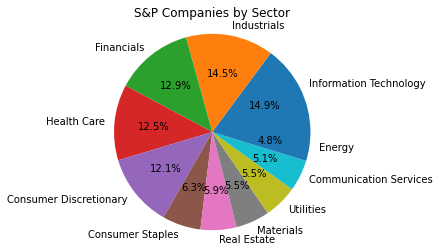

In [30]:
labels = s_and_p_company_info['GICS Sector'].value_counts().index
values = s_and_p_company_info['GICS Sector'].value_counts().values


plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('S&P Companies by Sector')
plt.axis('equal')
plt.show()

In [31]:
s_and_p_index.head(3)

,cal_day,open,high,Low,close,adjclose,volume,date,year,month,weekofyear,weekdayname
0,30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927-12-30,1927,12,52,Friday
1,03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928-01-03,1928,01,01,Tuesday
2,04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928-01-04,1928,01,01,Wednesday


In [32]:
per_each_neighbour_parent_count = s_and_p_index.groupby('year')['volume'].sum().reset_index(name = "total volume")

In [33]:
snp_year=per_each_neighbour_parent_count.sort_values('year', ascending=False)[1:20]

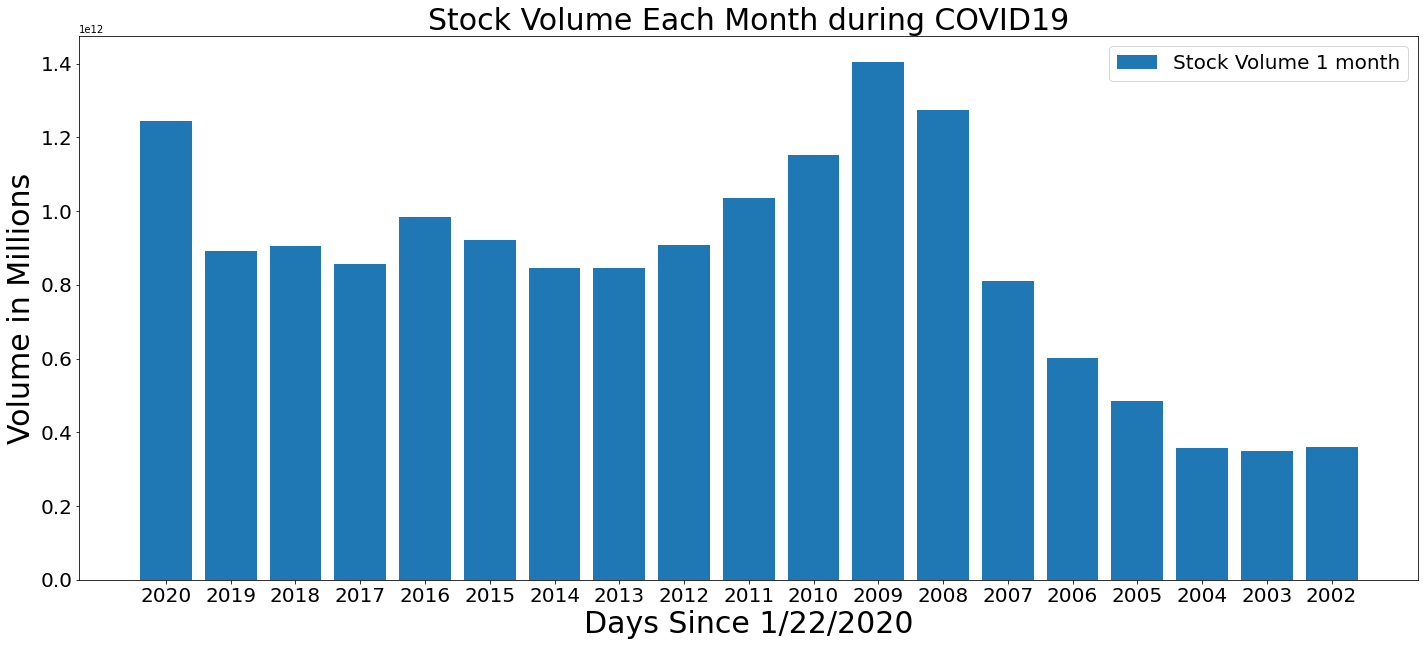

In [34]:
labels = snp_year['year']
values = snp_year['total volume'].values
window=1
plt.figure(figsize=(24, 10))
plt.bar(labels, values)
#plt.plot(labels, values, color='orange', linestyle='dashed')
plt.title('Stock Volume Each Month during COVID19', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Volume in Millions', size=30)
plt.legend(['Stock Volume {} month'.format(window), 'Stock Volume by month'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


### Step 2: Explore and Assess the Data
#### Explore the Data 
### Data quality issues
The date used in this project is of good quality so require only minor data cleaning, since data is of financial and Covid19 related so quality of data is very good.
#### Cleaning Steps
- NaN values are rename as '0'
- Column names are changed to lower cases.



In [35]:
# Performing cleaning tasks here




In [36]:
"""
   This function will group the data and append column name togeter
"""
def get_datashort(df,value_2,value3):
    value4 = df.groupby(['year','month'])[value_2].sum().reset_index(name = value3)
    value4=value4.sort_values('year', ascending=False)
    value4 = value4.query('year == "2020"')
    value4['year_month'] = value4['year'].str.cat(value4['month'],sep="-")
    return value4


In [37]:
snp_m_y=get_datashort(s_and_p_index,'volume','total volume')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
covid_m_y=get_datashort(covid19_df,'new_cases','total cases')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
covid_m_y.head(3)

,year,month,total cases,year_month
0,2020,01,28123.0,2020-01
1,2020,02,228945.0,2020-02
2,2020,03,2765642.0,2020-03


In [40]:
snp_m_y.head(3)

,year,month,total volume,year_month
1111,2020,07,97197020000,2020-07
1105,2020,01,77104420000,2020-01
1106,2020,02,84292270000,2020-02


In [41]:
covid_m_y.head(3)

,year,month,total cases,year_month
0,2020,01,28123.0,2020-01
1,2020,02,228945.0,2020-02
2,2020,03,2765642.0,2020-03


In [42]:
"""
   This function will filter data based on year, weekday and append column name
"""
def get_datashort_wkd(df,value_2,value3,NoWKEND,year2020):
    value4 = df.groupby(['year','month','date','weekdayname','cal_day'])[value_2].sum().reset_index(name = value3)
    
    if(year2020):
        value4 = value4.query('year == "2020"')

    
    #covid_m_d=covid_m_y.sort_values('year', ascending=False)
    #value4['month_date'] = value4['month'].str.cat(value4['date'],sep="-")
    if (NoWKEND):
        #print("NoWKED_B",value4)
        value4 = value4.query('weekdayname != "Saturday" & weekdayname != "Sunday"')
        #print("NoWKED_A",value4)
    
    #value4 = df.groupby(['year','month','date'])[value_2].sum().reset_index(name = value3)
    #covid_m_d=covid_m_y.sort_values('year', ascending=False)
    
    value4['month_date'] = value4['month'].str.cat(value4['cal_day'],sep="-")
    
    #print("NoWKED_modate",value4)
    return value4




In [43]:
covid19_df.head(10)

,iso_code,continent,location,cal_day,total_cases,new_cases,total_deaths,new_deaths,date,year,month,weekofyear,weekdayname
0,AFG,Asia,Afghanistan,24,1.0,1.0,0.0,0.0,2020-02-24,2020,02,08,Monday
1,AFG,Asia,Afghanistan,25,1.0,0.0,0.0,0.0,2020-02-25,2020,02,08,Tuesday
2,AFG,Asia,Afghanistan,26,1.0,0.0,0.0,0.0,2020-02-26,2020,02,08,Wednesday
3,AFG,Asia,Afghanistan,27,1.0,0.0,0.0,0.0,2020-02-27,2020,02,08,Thursday
4,AFG,Asia,Afghanistan,28,1.0,0.0,0.0,0.0,2020-02-28,2020,02,08,Friday
5,AFG,Asia,Afghanistan,29,1.0,0.0,0.0,0.0,2020-02-29,2020,02,08,Saturday
6,AFG,Asia,Afghanistan,01,1.0,0.0,0.0,0.0,2020-03-01,2020,03,09,Sunday
7,AFG,Asia,Afghanistan,02,1.0,0.0,0.0,0.0,2020-03-02,2020,03,09,Monday
8,AFG,Asia,Afghanistan,03,2.0,1.0,0.0,0.0,2020-03-03,2020,03,09,Tuesday
9,AFG,Asia,Afghanistan,04,4.0,2.0,0.0,0.0,2020-03-04,2020,03,09,Wednesday


In [44]:
covid_m_d_2020=get_datashort_wkd(covid19_df,'new_cases','total cases',NoWKEND=True,year2020=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
covid_m_d_2020.head(4)

,year,month,date,weekdayname,cal_day,total cases,month_date
0,2020,01,2020-01-01,Wednesday,01,0.0,01-01
1,2020,01,2020-01-02,Thursday,02,0.0,01-02
2,2020,01,2020-01-03,Friday,03,0.0,01-03
5,2020,01,2020-01-06,Monday,06,0.0,01-06


In [46]:
"""
   This function will group the data and append the column name
"""
def get_datashort22(df,value_2,value3):
    value4 = df.groupby(['year','month','date','cal_day'])[value_2].sum().reset_index(name = value3)
    value4=value4.sort_values('year', ascending=False)
    value4['month_date'] = value4['month'].str.cat(value4['cal_day'],sep="-")
    return value4

In [47]:
snp_m_d=get_datashort22(s_and_p_index,'volume','total volume')

In [48]:
snp_m_d.head(4)

,year,month,date,cal_day,total volume,month_date
23385,2021,02,2021-02-05,05,4838580000,02-05
23373,2021,01,2021-01-20,20,4551790000,01-20
23362,2021,01,2021-01-04,04,5006680000,01-04
23363,2021,01,2021-01-05,05,4582620000,01-05


In [49]:
covid_m_d=get_datashort22(covid19_df,'new_cases','total cases')

In [50]:
covid_m_d.head()

,year,month,date,cal_day,total cases,month_date
401,2021,02,2021-02-05,05,1750536.0,02-05
383,2021,01,2021-01-18,18,1678968.0,01-18
381,2021,01,2021-01-16,16,1937667.0,01-16
380,2021,01,2021-01-15,15,2444013.0,01-15
379,2021,01,2021-01-14,14,2430422.0,01-14


In [51]:
snp_m_d.head(4)

,year,month,date,cal_day,total volume,month_date
23385,2021,02,2021-02-05,05,4838580000,02-05
23373,2021,01,2021-01-20,20,4551790000,01-20
23362,2021,01,2021-01-04,04,5006680000,01-04
23363,2021,01,2021-01-05,05,4582620000,01-05


In [52]:
snp_m_d_2020 = snp_m_d.query('year == "2020"')


In [53]:
snp_m_d_2020.head()

,year,month,date,cal_day,total volume,month_date
23190,2020,04,2020-04-29,29,6620140000,04-29
23195,2020,05,2020-05-06,06,4861920000,05-06
23191,2020,04,2020-04-30,30,6523120000,04-30
23192,2020,05,2020-05-01,01,4753160000,05-01
23193,2020,05,2020-05-04,04,4723140000,05-04


In [54]:
snp_m_d.head()

,year,month,date,cal_day,total volume,month_date
23385,2021,02,2021-02-05,05,4838580000,02-05
23373,2021,01,2021-01-20,20,4551790000,01-20
23362,2021,01,2021-01-04,04,5006680000,01-04
23363,2021,01,2021-01-05,05,4582620000,01-05
23364,2021,01,2021-01-06,06,6049970000,01-06


In [55]:
covid_m_d.shape

(402, 6)

In [56]:
covid_m_y_label = covid_m_y['year_month']
covid_m_y_values = covid_m_y['total cases'].values

snp_m_y_label = snp_m_y['year_month']
snp_m_y_values = snp_m_y['total volume'].values





<AxesSubplot:label='2117ce46-8173-415c-ab8b-7074140e987c', xlabel='year_month', ylabel='total volume'>

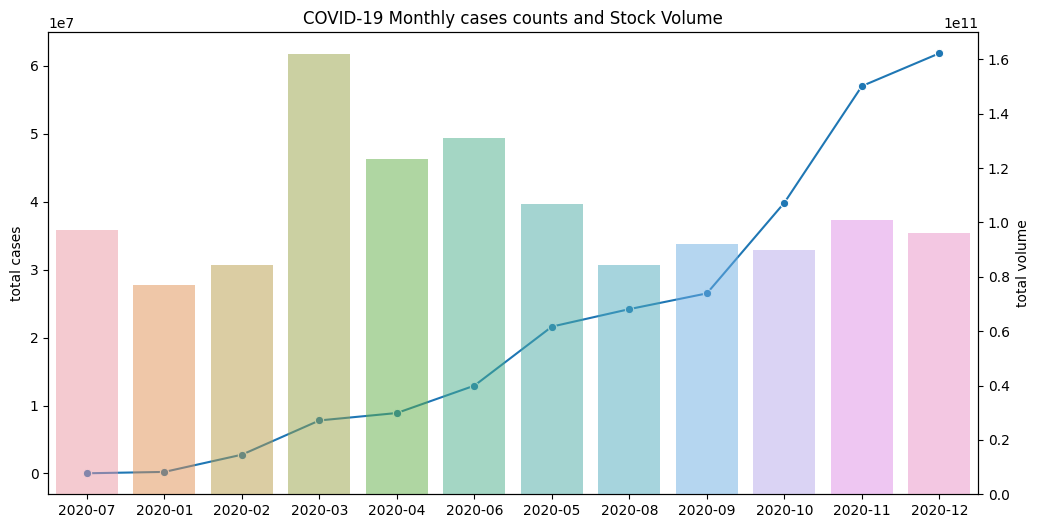

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
#ax1.title('Stock Volume Each Month during COVID19', size=30)

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = covid_m_y['total cases'], marker='o', sort = False, ax=ax1).set_title("COVID-19 Monthly cases counts and Stock Volume")
ax2 = ax1.twinx()

sns.barplot(data = snp_m_y, x=snp_m_y_label, y='total volume', alpha=0.5, ax=ax2)

In [58]:
covid_m_d_2020_label = covid_m_d_2020['month_date']
covid_m_d_2020_values = covid_m_d_2020['total cases'].values

snp_m_d_2020_label = snp_m_d_2020['month_date']
snp_m_d_2020_values = snp_m_d_2020['total volume'].values


<AxesSubplot:label='2731df06-eab1-47a3-b8bc-d3f791668f35', xlabel='month_date', ylabel='total volume'>

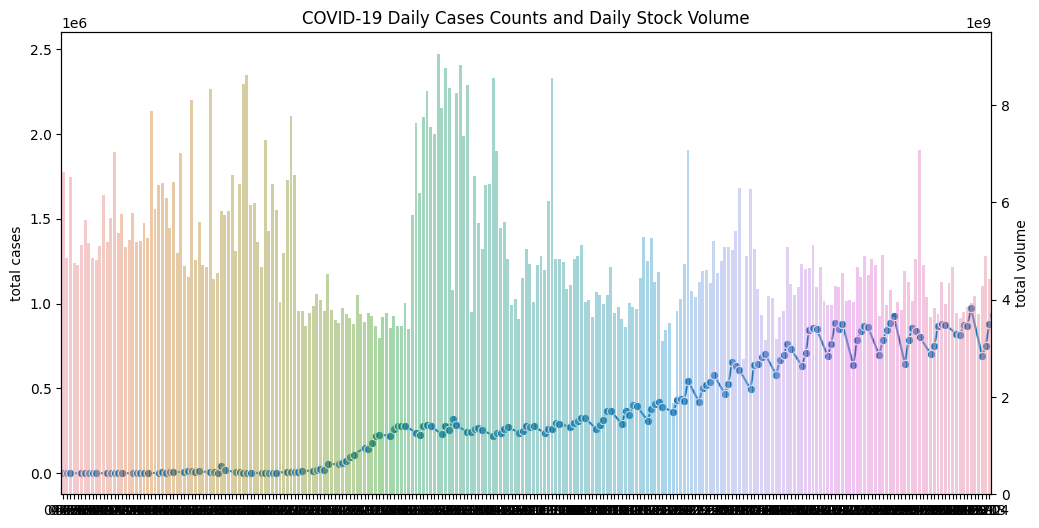

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = covid_m_d_2020['total cases'], marker='o', sort = False, ax=ax1).set_title("COVID-19 Daily Cases Counts and Daily Stock Volume")
ax2 = ax1.twinx()

sns.barplot(data = snp_m_d_2020, x=snp_m_d_2020_label, y='total volume', alpha=0.5, ax=ax2)

### Step 3: Define the Data Model
#### Conceptual Data Model
Star data model is used here is the flow of data modelling
- Data used is in CSV format
- CSV is moved to S3.
- Stagging, Facts and Dimension Tables are created
- Data first moved from S3 to staging table.
- Then data is moved from Staging to Facts and Dimension tables.


#### 3.2 Mapping Out Data Pipelines
Data relating to Stocks, S&P500 company list, COVID-19, S&P500 Index are placed in Dimentions and Facts tables.

#### Data Model - COVID-19 Impact of StockMarket
![Data Model - COVID-19 Impact of StockMarket](COVID-19-Impact-on-stockMarket-staging-4.png)
#### Data Model
![Staging Tables - COVID-19 Impact of StockMarket](staging_table_impact_of_covid-19-on-stockMarket.png)



### Step 4: Run Pipelines to Model the Data 
The data pipeline will be done using S3, Python and data stored in Redshift.

## Project files
1. dwh.cfg: contains AWS credentials for Redshift, link for S3 and other AWS info
2. create_tables.p: file for creating, deleting, copying tables
3. sql_queries.py: contain SQL statement for creating, deleting and ingesting tables
4. etl.py: this file run the pipeline which performs the complete job.


## How to run this project

1. First run this notebook, it will provide following CSV files
    1. covid19_df_clean.csv
    2. s_and_p_index_clean.csv
    3. csv_companylistsnp_500_final.csv
    4. snp_allcompanies_clean.csv
2. Upload above CSV files in S3 bucket
3. Configure the dwh.cfg file with your own credentials
4. run create_tables.py file for creating tables.
5. run etl.py file for executing the data pipeline


#### 4.2 Data Quality Checks
Data quality checks are done by analysing the data, creating the graphs for storytelling, these graphs are available in above sections

 

#### 4.3 Data dictionary 
Data dictionary is provided saperately as xls file, please see the file in left side.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
    * Redshift and S3 is good choice and redshift provde and S3 provide good performance and configuration is simple.

* Propose how often the data should be updated and why.
    * Data should be run weekly to get the analysis of the market based on COVID cases.
    
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
         * If data increase by 100x there is posibilty to juse horiziental scaling in AWS.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
         * Tableau dashoboard can be created on top of data model. 
 * The database needed to be accessed by 100+ people.
         * Tableau dashbord cane shared among people, if increase in user count, the performance of dahboad will not be compromised